In [1]:
import os
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)
FOLDER = '/content/gdrive/My Drive/Colab Notebooks/00.mycampus/[DL-202]Data/day2'
os.chdir(FOLDER)
print(os.getcwd())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/00.mycampus/[DL-202]Data/day2


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
#from sklearn.utils import shuffle
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import collections

Using TensorFlow backend.


In [0]:
df = pd.read_csv("creditcard_small.csv") # 

In [4]:
df[:10]

,Class,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,7.0,-0.894,0.286,-0.113,-0.272,2.670,3.722,0.370,0.851,-0.392,-0.410,-0.705,-0.110,-0.286,0.074,-0.329,-0.210,-0.500,0.119,0.570,0.053,-0.073,-0.268,-0.204,1.012,0.373,-0.384,0.012,0.142,93.20
1,0,10.0,1.449,-1.176,0.914,-1.376,-1.971,-0.629,-1.423,0.048,-1.720,1.627,1.200,-0.671,-0.514,-0.095,0.231,0.032,0.253,0.854,-0.221,-0.387,-0.009,0.314,0.028,0.501,0.251,-0.129,0.043,0.016,7.80
2,0,12.0,-2.792,-0.328,1.642,1.767,-0.137,0.808,-0.423,-1.907,0.756,1.151,0.845,0.793,0.370,-0.735,0.407,-0.303,-0.156,0.778,2.222,-1.582,1.152,0.222,1.021,0.028,-0.233,-0.236,-0.165,-0.030,58.80
3,0,15.0,1.493,-1.029,0.455,-1.438,-1.555,-0.721,-1.081,-0.053,-1.979,1.638,1.078,-0.632,-0.417,0.052,-0.043,-0.166,0.304,0.554,0.054,-0.388,-0.178,-0.175,0.040,0.296,0.333,-0.220,0.022,0.008,5.00
4,0,32.0,1.249,-0.625,-0.711,-0.992,1.430,3.693,-1.090,0.967,0.850,-0.307,-0.456,0.230,-0.017,-0.221,0.362,0.315,-0.512,0.119,0.575,0.098,-0.006,0.009,-0.129,1.113,0.500,1.197,-0.048,0.005,29.89
5,0,32.0,-2.009,2.199,0.144,1.159,-0.815,0.182,-0.617,1.531,-0.587,0.130,0.658,1.265,-0.207,1.014,-0.549,-0.708,0.870,-0.096,0.944,0.029,0.095,0.295,0.011,0.015,0.034,-0.236,0.128,0.118,2.35
6,0,34.0,0.202,0.497,1.374,0.571,-0.631,-0.540,-0.076,-0.917,0.270,-0.480,-0.513,0.681,0.090,-0.157,-0.589,-0.478,0.225,-0.669,-0.024,-0.222,0.719,-0.172,-0.166,0.776,0.818,0.443,0.143,0.219,9.99
7,0,42.0,-0.249,0.399,0.068,-1.061,2.410,3.737,0.316,0.672,0.015,-0.270,-0.495,-0.162,-0.274,-0.276,-0.172,-0.119,-0.550,-0.148,0.772,0.108,-0.258,-0.617,-0.157,1.031,0.121,0.310,-0.288,-0.224,32.51
8,0,50.0,-0.572,1.072,1.280,0.543,0.574,-0.259,1.061,-0.411,-0.179,1.004,1.062,0.159,-0.290,0.006,0.460,-0.221,-0.776,0.657,0.808,0.355,0.004,0.561,-0.199,0.001,-0.180,-0.374,0.072,-0.176,9.79
9,0,53.0,-1.199,-1.474,1.840,-4.516,0.328,-0.174,0.960,-1.026,1.700,-0.079,1.663,0.486,-0.933,-1.119,0.141,-2.812,-0.505,0.891,-1.512,-0.770,-0.453,0.335,-0.365,-0.310,-0.303,-1.244,-1.123,-0.734,89.17


In [5]:
# Time 칼럼은 의미없어 보이므로 제거함
df.drop(['Time'], axis=1, inplace=True)
df[:10]

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-0.894,0.286,-0.113,-0.272,2.670,3.722,0.370,0.851,-0.392,-0.410,-0.705,-0.110,-0.286,0.074,-0.329,-0.210,-0.500,0.119,0.570,0.053,-0.073,-0.268,-0.204,1.012,0.373,-0.384,0.012,0.142,93.20
1,0,1.449,-1.176,0.914,-1.376,-1.971,-0.629,-1.423,0.048,-1.720,1.627,1.200,-0.671,-0.514,-0.095,0.231,0.032,0.253,0.854,-0.221,-0.387,-0.009,0.314,0.028,0.501,0.251,-0.129,0.043,0.016,7.80
2,0,-2.792,-0.328,1.642,1.767,-0.137,0.808,-0.423,-1.907,0.756,1.151,0.845,0.793,0.370,-0.735,0.407,-0.303,-0.156,0.778,2.222,-1.582,1.152,0.222,1.021,0.028,-0.233,-0.236,-0.165,-0.030,58.80
3,0,1.493,-1.029,0.455,-1.438,-1.555,-0.721,-1.081,-0.053,-1.979,1.638,1.078,-0.632,-0.417,0.052,-0.043,-0.166,0.304,0.554,0.054,-0.388,-0.178,-0.175,0.040,0.296,0.333,-0.220,0.022,0.008,5.00
4,0,1.249,-0.625,-0.711,-0.992,1.430,3.693,-1.090,0.967,0.850,-0.307,-0.456,0.230,-0.017,-0.221,0.362,0.315,-0.512,0.119,0.575,0.098,-0.006,0.009,-0.129,1.113,0.500,1.197,-0.048,0.005,29.89
5,0,-2.009,2.199,0.144,1.159,-0.815,0.182,-0.617,1.531,-0.587,0.130,0.658,1.265,-0.207,1.014,-0.549,-0.708,0.870,-0.096,0.944,0.029,0.095,0.295,0.011,0.015,0.034,-0.236,0.128,0.118,2.35
6,0,0.202,0.497,1.374,0.571,-0.631,-0.540,-0.076,-0.917,0.270,-0.480,-0.513,0.681,0.090,-0.157,-0.589,-0.478,0.225,-0.669,-0.024,-0.222,0.719,-0.172,-0.166,0.776,0.818,0.443,0.143,0.219,9.99
7,0,-0.249,0.399,0.068,-1.061,2.410,3.737,0.316,0.672,0.015,-0.270,-0.495,-0.162,-0.274,-0.276,-0.172,-0.119,-0.550,-0.148,0.772,0.108,-0.258,-0.617,-0.157,1.031,0.121,0.310,-0.288,-0.224,32.51
8,0,-0.572,1.072,1.280,0.543,0.574,-0.259,1.061,-0.411,-0.179,1.004,1.062,0.159,-0.290,0.006,0.460,-0.221,-0.776,0.657,0.808,0.355,0.004,0.561,-0.199,0.001,-0.180,-0.374,0.072,-0.176,9.79
9,0,-1.199,-1.474,1.840,-4.516,0.328,-0.174,0.960,-1.026,1.700,-0.079,1.663,0.486,-0.933,-1.119,0.141,-2.812,-0.505,0.891,-1.512,-0.770,-0.453,0.335,-0.365,-0.310,-0.303,-1.244,-1.123,-0.734,89.17


In [6]:
# 정규분포로 normalize
columns_names = list(df.columns)
columns_names.remove('Class') # Class 칼럼은 정규화에서 제외
print('columns_names : ',columns_names)
# Normalize
for col in columns_names:
    mean, std = df[col].mean(), df[col].std()
    df[col] = (df[col] - mean) / std

columns_names :  ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [7]:
df[:20]

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-0.378335,0.121990,0.000945,-0.218009,1.619681,2.674616,0.256312,0.588626,-0.297580,-0.226790,-0.654252,-0.003523,-0.284465,0.127383,-0.353761,-0.132642,-0.270680,0.160526,0.673345,0.062681,-0.097488,-0.366442,-0.316092,1.684473,0.711898,-0.805746,0.021527,0.414895,0.021201
1,0,0.692668,-0.707823,0.525093,-0.926980,-1.147044,-0.428912,-0.745833,0.028630,-1.418558,1.199906,0.978571,-0.407800,-0.512004,0.006227,0.251967,0.083214,0.242433,0.938598,-0.274396,-0.463595,-0.024573,0.413663,0.051223,0.834865,0.478487,-0.274987,0.087625,0.048338,-0.272520
2,0,-1.245925,-0.226509,0.896641,1.091403,-0.053708,0.596087,-0.186912,-1.334747,0.671458,0.866520,0.674292,0.647211,0.370208,-0.452589,0.442339,-0.215595,-0.036270,0.858144,2.652699,-1.892914,1.298141,0.290347,1.623393,0.048436,-0.447503,-0.497698,-0.355870,-0.085484,-0.097113
3,0,0.712781,-0.624388,0.290834,-0.966795,-0.899046,-0.494535,-0.554682,-0.041805,-1.637183,1.207610,0.874002,-0.379695,-0.415200,0.111611,-0.044407,-0.093396,0.277185,0.621018,0.055097,-0.464791,-0.217113,-0.241786,0.070222,0.494024,0.635370,-0.464395,0.042849,0.025065,-0.282150
4,0,0.601246,-0.395082,-0.304255,-0.680381,0.880457,2.653931,-0.559712,0.669522,0.750805,-0.154650,-0.440828,0.241493,-0.016009,-0.084102,0.393664,0.335640,-0.278858,0.160526,0.679336,0.116505,-0.021155,0.004845,-0.197348,1.852400,0.954875,2.484958,-0.106404,0.016337,-0.196545
5,0,-0.888009,1.207786,0.132109,0.700955,-0.457896,0.149566,-0.295343,1.062844,-0.462181,0.151421,0.514009,0.987351,-0.205625,0.801269,-0.591725,-0.576842,0.662872,-0.067073,1.121456,0.033975,0.093913,0.388195,0.024307,0.026822,0.063322,-0.497698,0.268861,0.345075,-0.291265
6,0,0.122655,0.241752,0.759862,0.323352,-0.348205,-0.365430,0.007033,-0.644341,0.261221,-0.275818,-0.489684,0.566500,0.090774,-0.038221,-0.634991,-0.371689,0.223353,-0.673651,-0.038359,-0.266242,0.804829,-0.237765,-0.255928,1.292091,1.563273,0.915578,0.300844,0.638902,-0.264988
7,0,-0.083500,0.186128,0.093321,-0.724692,1.464682,2.685316,0.226130,0.463795,0.045973,-0.128736,-0.474256,-0.040996,-0.272489,-0.123532,-0.183940,-0.051473,-0.304752,-0.122120,0.915373,0.128466,-0.308256,-0.834237,-0.241679,1.716064,0.229771,0.638750,-0.618129,-0.649866,-0.187534
8,0,-0.231146,0.568115,0.711887,0.305370,0.370154,-0.164995,0.642526,-0.291467,-0.117785,0.763562,0.860288,0.190328,-0.288457,0.078634,0.499667,-0.142454,-0.458754,0.730053,0.958506,0.423898,-0.009762,0.744738,-0.308176,0.003545,-0.346103,-0.784932,0.149459,-0.510225,-0.265676
9,0,-0.517753,-0.876964,0.997693,-2.943436,0.223501,-0.104365,0.586075,-0.720355,1.468298,0.005039,1.375420,0.425976,-0.930156,-0.727879,0.154618,-2.453540,-0.274088,0.977766,-1.821216,-0.921695,-0.530417,0.441811,-0.570996,-0.513536,-0.581427,-2.595756,-2.398507,-2.133549,0.007340


In [8]:
# 정상건수 , Fraud건수 
Fraud = df[df.Class == 1]
Normal = df[df.Class == 0]
print('Fraud  : ', len(Fraud))
print('Normal : ', len(Normal))
ratio = len(Fraud) / len(Normal)
times = len(Normal) / len(Fraud)
print('Ratio :', ratio)
print('Times :', times)

Fraud  :  492
Normal :  28432
Ratio : 0.01730444569499156
Times : 57.78861788617886


In [9]:
Normal[:10]

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-0.378335,0.121990,0.000945,-0.218009,1.619681,2.674616,0.256312,0.588626,-0.297580,-0.226790,-0.654252,-0.003523,-0.284465,0.127383,-0.353761,-0.132642,-0.270680,0.160526,0.673345,0.062681,-0.097488,-0.366442,-0.316092,1.684473,0.711898,-0.805746,0.021527,0.414895,0.021201
1,0,0.692668,-0.707823,0.525093,-0.926980,-1.147044,-0.428912,-0.745833,0.028630,-1.418558,1.199906,0.978571,-0.407800,-0.512004,0.006227,0.251967,0.083214,0.242433,0.938598,-0.274396,-0.463595,-0.024573,0.413663,0.051223,0.834865,0.478487,-0.274987,0.087625,0.048338,-0.272520
2,0,-1.245925,-0.226509,0.896641,1.091403,-0.053708,0.596087,-0.186912,-1.334747,0.671458,0.866520,0.674292,0.647211,0.370208,-0.452589,0.442339,-0.215595,-0.036270,0.858144,2.652699,-1.892914,1.298141,0.290347,1.623393,0.048436,-0.447503,-0.497698,-0.355870,-0.085484,-0.097113
3,0,0.712781,-0.624388,0.290834,-0.966795,-0.899046,-0.494535,-0.554682,-0.041805,-1.637183,1.207610,0.874002,-0.379695,-0.415200,0.111611,-0.044407,-0.093396,0.277185,0.621018,0.055097,-0.464791,-0.217113,-0.241786,0.070222,0.494024,0.635370,-0.464395,0.042849,0.025065,-0.282150
4,0,0.601246,-0.395082,-0.304255,-0.680381,0.880457,2.653931,-0.559712,0.669522,0.750805,-0.154650,-0.440828,0.241493,-0.016009,-0.084102,0.393664,0.335640,-0.278858,0.160526,0.679336,0.116505,-0.021155,0.004845,-0.197348,1.852400,0.954875,2.484958,-0.106404,0.016337,-0.196545
5,0,-0.888009,1.207786,0.132109,0.700955,-0.457896,0.149566,-0.295343,1.062844,-0.462181,0.151421,0.514009,0.987351,-0.205625,0.801269,-0.591725,-0.576842,0.662872,-0.067073,1.121456,0.033975,0.093913,0.388195,0.024307,0.026822,0.063322,-0.497698,0.268861,0.345075,-0.291265
6,0,0.122655,0.241752,0.759862,0.323352,-0.348205,-0.365430,0.007033,-0.644341,0.261221,-0.275818,-0.489684,0.566500,0.090774,-0.038221,-0.634991,-0.371689,0.223353,-0.673651,-0.038359,-0.266242,0.804829,-0.237765,-0.255928,1.292091,1.563273,0.915578,0.300844,0.638902,-0.264988
7,0,-0.083500,0.186128,0.093321,-0.724692,1.464682,2.685316,0.226130,0.463795,0.045973,-0.128736,-0.474256,-0.040996,-0.272489,-0.123532,-0.183940,-0.051473,-0.304752,-0.122120,0.915373,0.128466,-0.308256,-0.834237,-0.241679,1.716064,0.229771,0.638750,-0.618129,-0.649866,-0.187534
8,0,-0.231146,0.568115,0.711887,0.305370,0.370154,-0.164995,0.642526,-0.291467,-0.117785,0.763562,0.860288,0.190328,-0.288457,0.078634,0.499667,-0.142454,-0.458754,0.730053,0.958506,0.423898,-0.009762,0.744738,-0.308176,0.003545,-0.346103,-0.784932,0.149459,-0.510225,-0.265676
9,0,-0.517753,-0.876964,0.997693,-2.943436,0.223501,-0.104365,0.586075,-0.720355,1.468298,0.005039,1.375420,0.425976,-0.930156,-0.727879,0.154618,-2.453540,-0.274088,0.977766,-1.821216,-0.921695,-0.530417,0.441811,-0.570996,-0.513536,-0.581427,-2.595756,-2.398507,-2.133549,0.007340


In [10]:
Fraud[:10]

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
61,1,-1.026513,1.067592,-0.763076,2.524114,-0.283225,-0.998119,-1.368470,0.965909,-2.304874,-1.881114,2.694535,-2.014097,-0.592840,-3.000452,0.423951,-0.963063,-1.858401,0.016557,0.490027,0.151191,0.574693,-0.054132,-0.729321,0.533927,0.084367,0.364005,0.552442,-0.414222,-0.299347
68,1,-1.361116,-1.832215,0.613897,1.426623,0.838726,-0.739907,0.231719,-0.052266,-0.195443,-0.527258,-0.405686,-0.286733,0.676587,-1.138662,2.166500,0.649613,0.478887,1.860639,0.329475,2.513454,0.739890,0.575849,2.185448,-0.486933,0.533970,-0.308290,-0.543503,0.106522,1.520071
517,1,-1.022399,0.958047,-0.125116,1.452952,-0.462069,-0.034463,0.363625,-0.283098,-0.167587,-1.007726,1.692556,-4.651623,0.023910,-0.979511,-0.753974,-1.980798,-3.188543,-2.734747,-1.607944,-0.515027,-0.349271,-1.256459,0.280794,-0.142767,-0.300186,-1.136690,0.081229,-0.443314,0.525857
649,1,-1.980039,0.730445,-1.264768,1.677716,-0.644491,-1.197840,-1.904475,-0.178491,-0.176028,-3.302907,4.146505,-7.788550,0.184584,-4.779798,-0.005467,-6.508421,-8.514561,-5.398186,0.359428,-0.206438,0.639632,0.230030,-0.683407,-0.087900,0.480400,-1.373970,-1.767379,2.474596,-0.096425
675,1,0.594390,1.673776,-2.138518,2.996119,2.188407,-0.948902,1.006942,-0.350744,-1.049682,-1.653487,1.750841,-3.246384,1.461995,-4.283703,-0.364577,2.357729,4.662156,3.254816,-3.270985,0.010053,-0.446110,-0.950851,-1.033306,-2.713207,2.847032,1.173672,-0.025381,0.429441,-0.295908
676,1,0.033976,2.308339,-3.126591,4.243882,0.485807,-2.371917,-0.862647,0.103250,-2.326821,-4.273649,4.804777,-7.025397,-0.304424,-7.590047,-0.687993,-1.766726,-0.699297,0.157350,-2.328036,0.582977,0.401521,-0.822174,-0.848065,0.216363,2.845119,1.050869,1.565232,1.497111,-0.295908
677,1,0.042661,2.304934,-3.289908,4.033888,0.820842,-1.772753,-0.894506,0.206462,-2.616350,-4.173493,5.739900,-6.372501,0.702534,-7.620873,-1.490582,-1.407263,-1.119736,0.857086,-1.599557,0.702585,0.408357,-0.780622,-1.053888,-1.261723,3.068964,1.119555,1.567364,1.447655,-0.295908
678,1,0.181165,2.067114,-2.889269,3.859856,1.021744,-1.706416,-0.404891,0.087908,-1.835549,-3.535437,3.859368,-6.319174,-0.794431,-6.504660,-0.275881,-0.723124,0.964743,0.853910,-2.850432,0.322231,0.164549,-0.881151,-0.867064,-1.190230,2.707368,1.148695,1.128133,1.177101,-0.295908
679,1,0.174765,2.121603,-2.807100,3.839948,0.954379,-1.871187,-0.368002,0.034209,-2.228060,-3.412869,5.469048,-5.343433,0.386176,-6.558427,-1.474357,-0.393097,0.604269,1.616102,-2.175870,0.463369,0.223792,-0.693496,-0.917728,-0.363898,2.820247,1.015485,1.102547,1.174192,-0.295908
685,1,0.362179,1.265680,-2.661645,2.530536,-1.003372,-1.215672,-2.168845,0.737168,-0.376926,-3.178938,4.740492,-5.075357,1.677558,-4.377617,0.537525,-3.156410,-3.221251,-0.652479,2.686248,0.603310,0.657861,0.140224,0.958427,-0.604981,-3.527759,0.726169,1.264594,0.289800,-0.295908


In [11]:
# 80%를 학습용으로 
FraudSample  = Fraud.sample(frac=0.8)
NormalSample = Normal.sample(frac=0.8)
trainData = pd.concat([FraudSample, NormalSample], axis=0)
trainData = trainData.sample(frac=1.0) # shuffling
# 나머지를 test용으로
testData = df.loc[~df.index.isin(trainData.index)]
testData = testData.sample(frac=1.0) # shuffling

print('len(trainData)  : ',len(trainData))
print('len(testData)   : ',len(testData))

len(trainData)  :  23140
len(testData)   :  5784


In [12]:
AUGMENT = 50
def onehot_for_anomaly(is_fraud):
    # 0번방 - 정상, 1번방 - 비정상
    if is_fraud:
        return [0, AUGMENT]
    else:
        return [1, 0]

# 확인
print('정상', onehot_for_anomaly(0))
print('Fraud',onehot_for_anomaly(1)) 

정상 [1, 0]
Fraud [0, 50]


In [13]:
Xtr = trainData.drop(['Class'], axis=1)
Ytr = [onehot_for_anomaly(y) for y in trainData.Class]
print(Ytr[:60])

[[1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 50], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 50], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0]]


In [14]:
Xte = testData.drop(['Class'], axis=1)
Yte = [onehot_for_anomaly(y) for y in testData.Class]
print(Yte[:60])

[[1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 50], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 50], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0]]


In [15]:
Xtr = Xtr.values
Ytr = np.array(Ytr)
Xte = Xte.values
Yte = np.array(Yte)
print('Xtr shape:', Xtr.shape)
print('Ytr shape:', Ytr.shape)

Xtr shape: (23140, 29)
Ytr shape: (23140, 2)


In [0]:
# Confusion Matrix
def get_conf_rate(model, testX, testY):
    # 모델 예측
    predicted_y = model.predict(testX)

    # compare predicted_y & testY
    conf_cnt = collections.defaultdict(int)
    for pr_y, real_y in zip(predicted_y, testY):
        conf = np.argmax(pr_y), np.argmax(real_y)
        conf_cnt[conf] += 1
    # 0번방 == Norm, 1번방 == Fraud
    TP = conf_cnt[(1, 1)]
    FN = conf_cnt[(0, 1)]
    TN = conf_cnt[(0, 0)]
    FP = conf_cnt[(1, 0)]

    Acc = (TP + TN) / (TP + TN + FP + FN)
    try:
        Precision = TP / (TP + FP)
    except: # 학습초기에 decision by zero 발생 가능 (범죄라고 판단한 건수가 zero인 상황
        Precision = 0
      
    try:
        Recall = TP / (TP + FN)
    except:
        Recall = 0
        raise

    print('\nTP :', TP, ' FN :',FN , ' TN :', TN, ' FP :', FP)
    print('Recall: %.3f, Precision: %.3f, Acc: %.3f' % (Recall, Precision, Acc))
    return Recall, Precision, Acc

In [0]:
# Callback Class
class mykerasCB(keras.callbacks.Callback):
    def __init__(self):
        super(mykerasCB, self).__init__() # 부모 클래스의 constructor 호출
        self.hist = [] # confusion matrix값 (비율)을 기록하기 위한 것

    def on_epoch_end(self, epoch, logs):
        if epoch % 1 == 0: # 10번 epoch 마다 출력해보기
          confusion = get_conf_rate(self.model, Xtr, Ytr)
          get_conf_rate(self.model, Xte, Yte)
          self.hist.append(confusion)
    def on_batch_end(self, batch, logs):
        pass
        

In [18]:
# 모델 구성하기
model = Sequential()
model.add(Dense(20, input_dim=Xtr.shape[1], activation='sigmoid'))
model.add(Dense(30, activation='tanh'))
model.add(Dense(40, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

cb = mykerasCB() # Callback Class의 객체 생성
#model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy'])
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
# 모델 학습시키기
hist = model.fit(Xtr, Ytr, epochs=20, 
                 batch_size=256,
                 shuffle=True,
                 validation_data = (Xte, Yte),
                 callbacks = [cb], verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 23140 samples, validate on 5784 samples
Epoch 1/20
23140/23140 [==============================] - 3s 113us/step - loss: 1.0328 - acc: 0.8971 - val_loss: 0.6385 - val_acc: 0.9964

TP : 322  FN : 72  TN : 22729  FP : 17
Recall: 0.817, Precision: 0.950, Acc: 0.996

TP : 80  FN : 18  TN : 5683  FP : 3
Recall: 0.816, Precision: 0.964, Acc: 0.996
Epoch 2/20
23140/23140 [==============================] - 1s 41us/step - loss: 0.4479 - acc: 0.9917 - val_loss: 0.3351 - val_acc: 0.9812

TP : 349  FN : 45  TN : 22290  FP : 456
Recall: 0.886, Precision: 0.434, Acc: 0.978

TP : 88  FN : 10  TN : 5587  FP : 99
Recall: 0.898, Precision: 0.471, Acc: 0.981
Epoch 3/20
23140/23140 [==============================] - 1s 36us/step - loss: 0.3325 - acc: 0.9806 - val_loss: 0.2756 - val_acc: 0.9810

TP : 352  FN : 42  TN : 22327  FP : 419
Recall: 0.893, Precision: 0.457, Acc: 0.980

TP : 89  FN : 9  TN : 5585  FP : 101
Recall: 0.908, Precision: 0.468, Acc

In [20]:
# 최종 confusion matrix 구하기
print('AUGMENT:', AUGMENT)
get_conf_rate(model, Xte, Yte)

AUGMENT: 50

TP : 92  FN : 6  TN : 5564  FP : 122
Recall: 0.939, Precision: 0.430, Acc: 0.978


(0.9387755102040817, 0.42990654205607476, 0.9778699861687413)

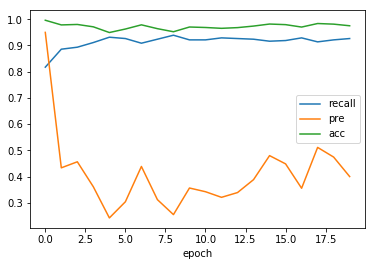

In [21]:
# Recall, Precision, Acc
fig, ax =  plt.subplots()
recall = [h[0] for h in cb.hist]
precision = [h[1] for h in cb.hist]
accuracy = [h[2] for h in cb.hist]

ax.plot(recall, label='recall')
ax.plot(precision, label='pre')
ax.plot(accuracy, label='acc')

ax.set_xlabel('epoch')
ax.legend()
plt.show()

In [22]:
model.layers[0].get_weights()

[array([[ 0.00425394,  0.3571273 , -0.09446759, -0.00761241,  0.10050238,
          0.16875905,  0.34072125, -0.38387278, -0.09672453, -0.0499007 ,
         -0.2538752 ,  0.25134924, -0.1050623 ,  0.09547651,  0.11343523,
          0.11877474, -0.12371908,  0.23837298,  0.32518953,  0.20818605],
        [-0.20139557, -0.40230703,  0.00722904,  0.14928104, -0.12041856,
          0.11444508, -0.18455245,  0.20334017,  0.08480668, -0.43418086,
         -0.09751809, -0.0244622 , -0.12503801,  0.3986291 ,  0.00591021,
         -0.07197066,  0.32998484, -0.11684275,  0.02969266, -0.36131617],
        [-0.04997574, -0.07076725, -0.0700932 ,  0.10335524,  0.02776892,
          0.17064616,  0.25566804, -0.36108544,  0.42986453,  0.42556608,
          0.13449766,  0.27678746,  0.17521034, -0.27187532, -0.02098892,
         -0.18845221, -0.03960398, -0.10688376, -0.2611733 ,  0.12520818],
        [-0.18062922,  0.20939529,  0.0768479 , -0.08012583,  0.1866798 ,
          0.14993754, -0.39311194, 